# Polynomial Interpolation

In [1]:
clear, format short, format compact

## I. Polynomials in MatLab

Polynomials are stored as as coefficient vectors in MatLab.

In [2]:
nrpt = 100;
p = [1 -3 3 -1];  % MatLab order: x^3 - 3*x^2 + 3*x - 1 = (x - 1)^3
x = linspace(0, 2, nrpt);

**Task 1:** Plot the polynomial on $[0, 2]$.

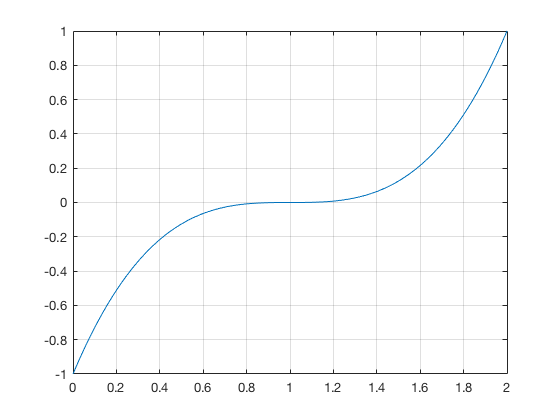

In [3]:
% We will use an anonymous function here.
fp = @(x) x.^3 - 3*x.^2 + 3*x - 1;
yp = fp(x);
plot(x, yp)
grid on

**Task 2.** Do the same using Horner's method.

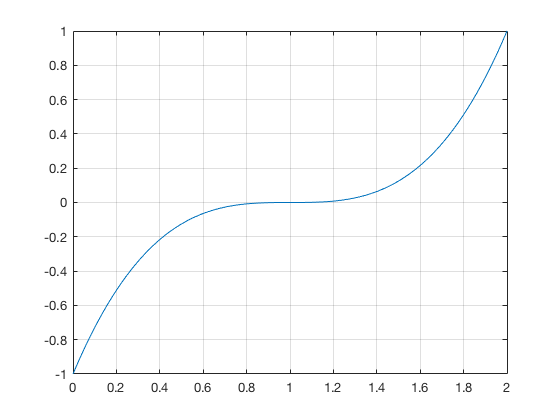

In [4]:
yh = p(1);
for j = 2:4
    yh = yh.*x + p(j);
end
plot(x, yh)
grid on

**Task 3.** Compare the results of the previous two.

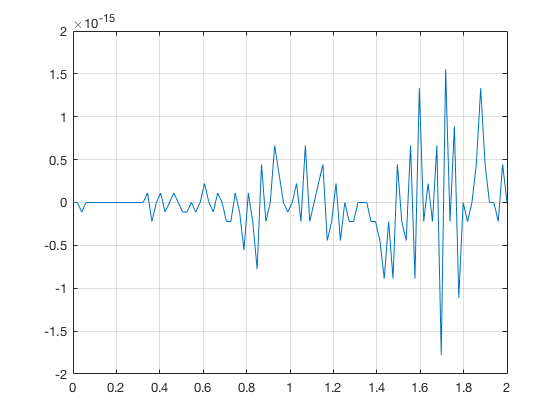

In [5]:
plot(x, yp-yh)
grid on

MatLab has a built-in function for polynomial evaluation.

```
  y = polyval( <coefficient vector>, <x-values> )
```

In [6]:
y = polyval(p, x);
err = norm(y-yh, 'inf');
disp(['error between polyval and Horner: ',...
    num2str(err)])

error between polyval and Horner: 0


## II. Polynomial Interpolation

### 1. Vandermonde Matrix

Interpolate the data set $\{ (x_j, y_j) : j \in \mathbb{N}[1,3] \} = \{(1,4), (3,2), (5,1) \}$ with a polynomial $p_2(x) = c_1 + c_2 x + c_3 x^2$.

In [7]:
% x and y data points as column vectors
xdp = [1, 3, 5]';
ydp = [4, 2, 1]';
n = length(xdp);
V = xdp .^ [0:n-1];
c = V\ydp

c =
    5.3750
   -1.5000
    0.1250


In MatLab, `vander` calculates the Vandermonde matrix given abscissas,
but in a different orientation. 

In [8]:
% using build-in function vander:
V1 = fliplr(vander(xdp));
c1 = V1\ydp

c1 =
    5.3750
   -1.5000
    0.1250


### 2. Power Form v.s. Shifted Power Form

If you are working near a point $c$, 
it may be good idea to make use of expansion near $c$, that is,
use 
\begin{equation*}
\{ 1, x-c, (x-c)^2, \cdots, (x-c)^{n-1} \}
\end{equation*}
as a basis for $\Pi_{n-1}$. 

In [9]:
p_sh = @(x) (x - 1000).^3 + 1;
p = @(x) x.^3 - 3000*x.^2 + 3000000*x - 999999999;
disp(['        1 + 1/27 = ', num2str(1 + 1/27, 15)]);
disp(['   p(1000 + 1/3) = ', num2str(p(1000 + 1/3), 15)]);
disp(['p_sh(1000 + 1/3) = ', num2str(p_sh(1000 + 1/3), 15)]);

        1 + 1/27 = 1.03703703703704
   p(1000 + 1/3) = 1.03703689575195
p_sh(1000 + 1/3) = 1.03703703703705


### 3. Lagrange Form

In [10]:
%%file mylagrange.m
function y = mylagrange(xdp, j, x)
% input:  xdp = abscissas of data points
%         j = evaluate j-th lagrange polynomial
%         x = points where polynomial or derivative is evaluated:
%             scalar, vector, or matrix
% output: y = ell_j(x)
    nr_dp = length(xdp);
    y = ones(size(x));
    for k = 1:nr_dp
        if k ~= j
            y = y .* (x - xdp(k))/(xdp(j) - xdp(k));
        end
    end
end


Created file '/Users/tae/Dropbox/Sp19-Math3607/lectures/mylagrange.m'.


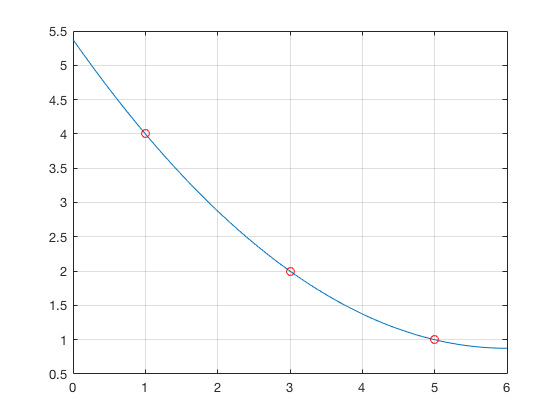

In [11]:
x = linspace(0, 6, 100);
y = zeros(size(x));
for j = 1:n
    y = y + ydp(j)*mylagrange(xdp, j, x);
end
plot(x, y, xdp, ydp, 'ro')
grid on

### 4. Using MatLab Function `polyfit`

Now we will work with a different set of data points.

In [12]:
xdp = [2 3 5 8]';
ydp = [3 -2 12 3]';
n = length(xdp);
xs = linspace(xdp(1), xdp(end), nrpt); % points for plotting

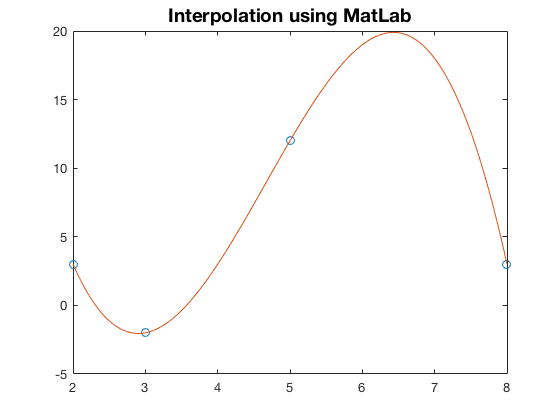

In [13]:
% using built-in function: q = polyfit(xdp, ydp, degree)
c = polyfit(xdp, ydp, n-1);
ys = polyval(c, xs);
FS = 'fontsize';
fs = 14;
figure();
plot(xdp, ydp, 'o', xs, ys)
title('Interpolation using MatLab', FS, fs)

## III. Equispaced- vs Chebyshev nodes

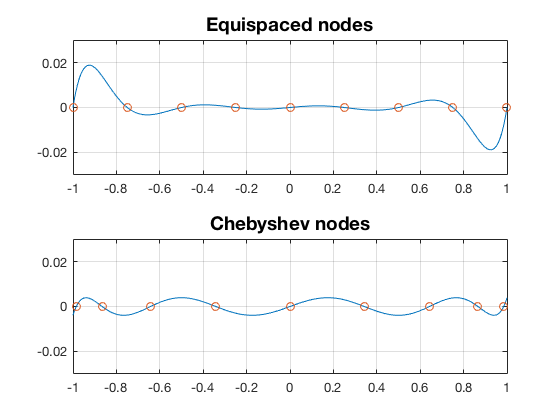

In [14]:
n = 9;
nrpt = 1e3;
x_unif = linspace(-1, 1, n)';
th_unif = linspace(0, pi, n+1)';
th_unif(end) = [];  % delete the last element
th_unif = pi/(2*n) + th_unif;
x_cheb = -cos(th_unif);

% calculate rho_{n-1}(x)
x = linspace(-1, 1, nrpt);
X_unif = x - x_unif; % repmat(x, n, 1) - repmat(x_unif, 1, nrpt)
rho_unif = prod(X_unif, 1);
X_cheb = x - x_cheb;
rho_cheb = prod(X_cheb, 1);

figure()
subplot(2, 1, 1)
plot(x, rho_unif, x_unif, zeros(n, 1), 'o')
title('Equispaced nodes', FS, fs)
ylim([-0.03, 0.03])
grid on

subplot(2, 1, 2)
plot(x, rho_cheb, x_cheb, zeros(n, 1), 'o')
title('Chebyshev nodes', FS, fs)
ylim([-0.03, 0.03])
grid on

## IV. Piecewise Polynomial Interpolation

Instead of using a single (possibly high-order) polynomial 
to go through all the data, 
we can use multiple lower-order polynomials 
to connect two consecutive points. 


### 1. Piecewise Linear Interpolation

In [15]:
xdp = [1 3 4 7 9]';
ydp = [0 5 2 4 8]';
x = linspace(1, 9, 1000);

For piecewise polynomial interpolation, we use
`interp1` function as follows.

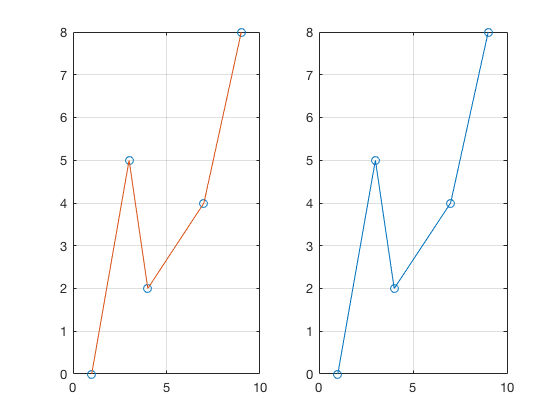

In [16]:
pp1 = interp1(xdp, ydp, 'linear', 'pp');
y1 = ppval(pp1, x);
subplot(121)
plot(xdp, ydp, 'o', x, y1)
grid on
subplot(122)
plot(xdp, ydp, 'o-')
grid on

Note that `plot` function does piecewise linear interpolation by default. 

### 2. Cubic Spline

We can make it look smooth by connecting each pair of consecutive points using a cubic polynomial. This is called  a cubic spline.

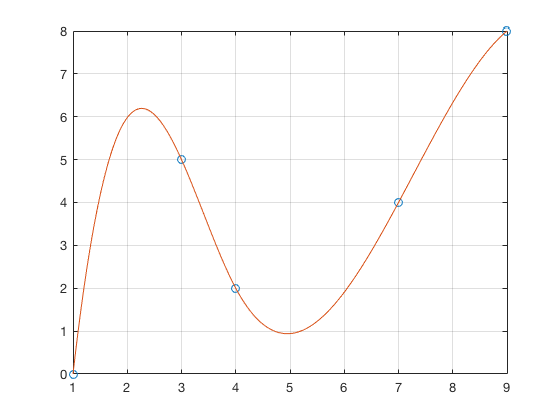

In [17]:
pp3 = interp1(xdp, ydp, 'spline', 'pp'); % or pp = spline(xdp, ydp);
y3 = ppval(pp3, x);
plot(xdp, ydp, 'o', x, y3)
grid on